# Figures 2 and S4: EKE time series and trends (1993-2022)

* **Fig. 2**: EKE time series and trends. Area-weighted mean EKE time series computed over (A) the global ocean and (B) the high EKE regions, for the all-sat (red line) and two-sat (blue line) altimetric products. Thinner lines represent the original data, while thicker lines show the yearly-rolling mean (i.e. 365-day-window moving average). (C) Trends of the original area-weighted mean EKE time series shown in (A, B), computed from 1993 to 2022. All trends are statistically significant (p < 0.05). 


* **Fig. S4**: EKE time series and trends. Area-weighted mean EKE time series computed over (A) the global ocean, (B) the high EKE regions, (C) the tropical band, and (D) the global ocean excluding the high EKE regions and the tropical band (called residual), for the all-sat (red line) and two-sat (blue line) altimetric products. Thinner lines represent the original data, while thicker lines show the yearly-rolling mean (i.e. 365-day-window moving average). (E) Trends of the original area-weighted mean EKE time series shown in (A-D). Significant trends (p < 0.05) are written in bold text, while non-significant trends are written in italics. 


### Import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.lines as mlines
import pandas as pd
import sys
import os
import dask
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import utils
import plot_utils
import pymannkendall as mk
from matplotlib.patches import Patch


### Function to calculate trends

In [2]:
def mk_test(ts):
    
    if np.isnan(ts).all():
        return np.nan, np.nan
    results = mk.yue_wang_modification_test(ts)
    slope, p_value = results.slope, results.p
    return slope, p_value

### Open files with the time series of each region

In [3]:
kinds = ['ALL_SAT', 'TWO_SAT']
timeseries = {}
for kind in kinds:
    path_ts = f'../../results/EKE_{kind}/tseries/EKE_{kind}_tseries.nc'
    timeseries[kind] = xr.open_dataset(path_ts)

### Calculate trends for each EKE time series and save values into a list

In [4]:
# Multply by the factor 365 days to convert trends per day to trends per year 
# units from (cm$^2$ s$^{-2}$ day$^{-1}$) to (cm$^2$ s$^{-2}$ y$^{-1}$)
factor = 365

In [5]:
list_slope_all = []
list_slope_two = []
list_pval_all  = []
list_pval_two  = []

In [6]:
    dic_keys = ['no ice', 'high eke', 'tropical', 'remainder']

    for k in range(len(dic_keys)):
            
            print('')
            print('----------------')
            print(dic_keys[k])
            print('----------------')
            
            # all-sat raw
            all_ts = timeseries['ALL_SAT'][dic_keys[k]]
            
            # all-sat 365 day rolling mean 
            all_ts_roll = all_ts.rolling(time=365, center=True).mean()

            # two-sat raw
            two_ts = timeseries['TWO_SAT'][dic_keys[k]]
            
            # two-sat 365 day rolling mean 
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
       
         
            print('computing trends for this period:') 
            print('all_sat', all_ts.time.min(), all_ts.time.max())
            print('two_ts', two_ts.time.min(), two_ts.time.max())
            
            # MK test
            slope_allraw,  p_value_allraw  = mk_test(all_ts)
            slope_tworaw,  p_value_tworaw  = mk_test(two_ts)
            
            slope_allroll, p_value_allroll = mk_test(all_ts_roll)            
            slope_tworoll, p_value_tworoll = mk_test(two_ts_roll) 
            
            
            list_slope_all.append(slope_allraw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_slope_two.append(slope_tworaw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_pval_all.append(p_value_allraw) 
            list_pval_two.append(p_value_tworaw)           
            
            
            print(' ')
            print('Yue and Wang Modified MK Test')
            print('trends, p_value')
            print('all-sat raw... ',  slope_allraw*factor,  p_value_allraw)
            print('two-sat raw... ',  slope_tworaw*factor,  p_value_tworaw)
            
            print(' ')
            print('all-sat roll... ', slope_allroll*factor, p_value_allroll)            
            print('two-sat roll... ', slope_tworoll*factor, p_value_tworoll)            
            

                            


----------------
no ice
----------------
computing trends for this period:
all_sat <xarray.DataArray 'time' ()>
array('1993-01-01T00:00:00.000000000', dtype='datetime64[ns]') <xarray.DataArray 'time' ()>
array('2022-12-31T00:00:00.000000000', dtype='datetime64[ns]')
two_ts <xarray.DataArray 'time' ()>
array('1993-01-01T00:00:00.000000000', dtype='datetime64[ns]') <xarray.DataArray 'time' ()>
array('2022-12-31T00:00:00.000000000', dtype='datetime64[ns]')
 
Yue and Wang Modified MK Test
trends, p_value
all-sat raw...  0.6388247294449968 2.220446049250313e-16
two-sat raw...  0.1865899272215498 0.021219569281679895
 
all-sat roll...  0.6486327787705843 1.0685918816477624e-10
two-sat roll...  0.26313580054297536 0.011706081518403133

----------------
high eke
----------------
computing trends for this period:
all_sat <xarray.DataArray 'time' ()>
array('1993-01-01T00:00:00.000000000', dtype='datetime64[ns]') <xarray.DataArray 'time' ()>
array('2022-12-31T00:00:00.000000000', dtype='datetime

## FIGURE S4: Figure Global, High EKE regions, Tropics and Residual 

Figure parameters

In [7]:
tseries   = timeseries
fig_size  = 30 
ratio     = 0.85 
text_size = 1.1 
extension = 'png'

lw        = 0.15  
legend_pos= ['lower right', 'upper left', 'upper right', 'lower right']
titles    = ['Global', 'High EKE regions', 'Tropics', 'Residual ']
dic_keys  = ['no ice', 'high eke', 'tropical', 'remainder']
    

Bar plot parameters

In [8]:
wdth  = 0.25
ofset = -wdth/1.75
x     = np.array(list(range(4))) 
label_unit = "(cm$^2$ s$^{-2}$ y$^{-1}$)"

Mark non significant trends in the bar plots

In [9]:
threshold = 0.05  

mask_nonsig_all = [r'////' if x > threshold else None for x in list_pval_all]
mask_nonsig_two = [r'////' if x > threshold else None for x in list_pval_two]

text_style_all = ['italic' if x > threshold else 'normal' for x in list_pval_all]
text_style_two = ['italic' if x > threshold else 'normal' for x in list_pval_two]

Plot figure 

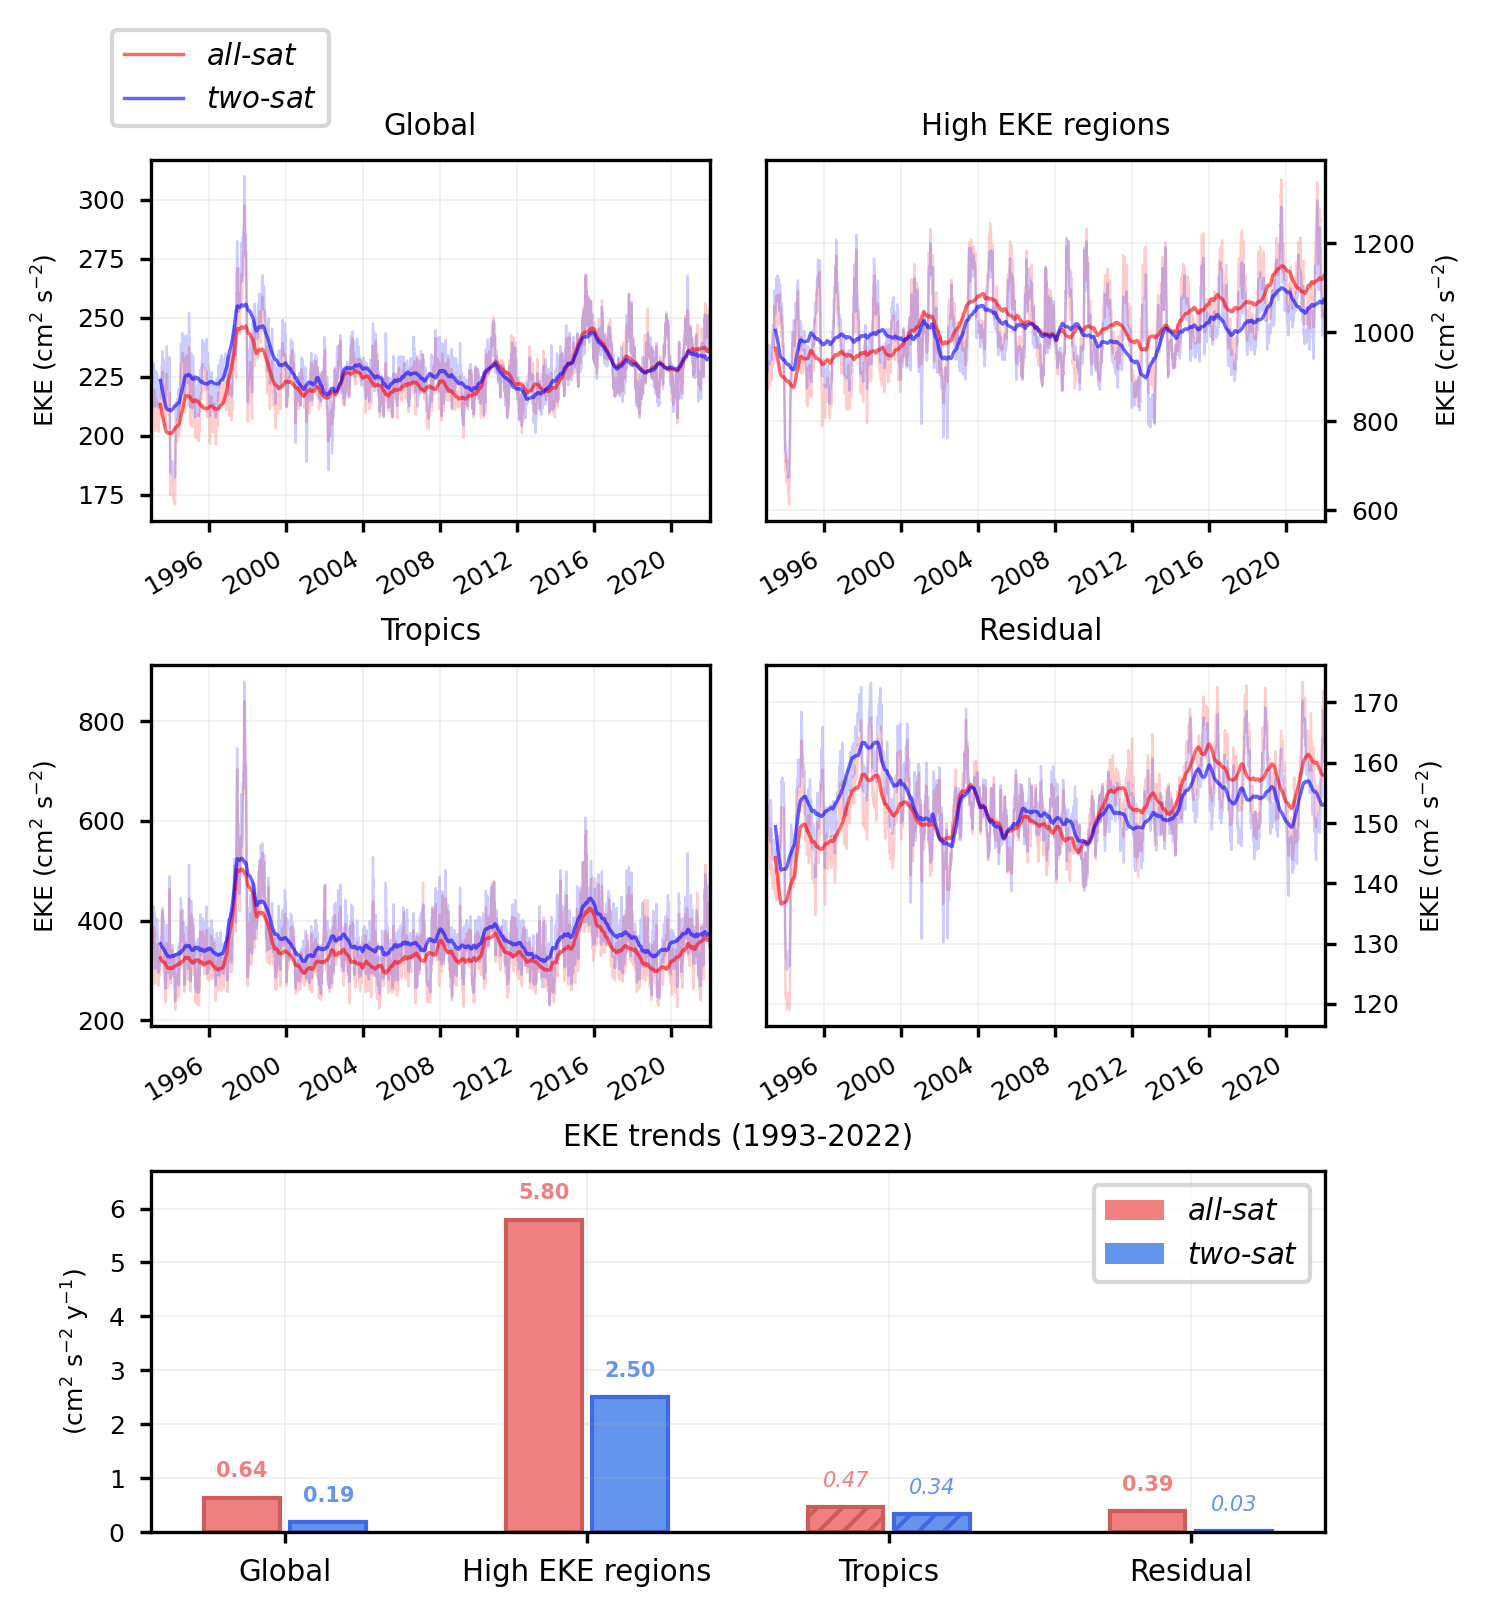

In [10]:
    fs = np.sqrt(fig_size)

    fig = plt.figure(figsize=(np.sqrt(ratio*fig_size),
                              np.sqrt(fig_size/ratio)),
                     dpi=300)

    gs = mpl.gridspec.GridSpec(3, 2, figure=fig, 
                               height_ratios=[1, 1, 1], 
                               width_ratios=[1, 1])
    ax = [[None]*2 for _ in range(3)]

    fig.subplots_adjust(hspace=0.4, wspace=0.1)

    k = 0
    for i in range(2):
        for j in range(2):
            ax[i][j] = fig.add_subplot(gs[i, j])
            if j == 1:
                ax[i][j].yaxis.tick_right()
                ax[i][j].yaxis.set_label_position("right")
            
            ax[i][j].grid(which='major', linewidth=fs*0.015)
            ax[i][j].xaxis.set_tick_params(which='minor', bottom=False)
            
            
            ax[i][j].tick_params(axis='both', which='major',
                                labelsize=text_size*fs,
                                size=fs*0.5,
                                width=fs*0.15)

            all_ts = tseries['ALL_SAT'][dic_keys[k]]
            #365 day rolling mean 
            all_ts_roll = all_ts.rolling(time=365, center=True).mean()
            all_ts_roll.plot(color='r',
                        alpha=0.6,
                        label='ALL SAT',
                        linewidth=fs*lw,
                        ax=ax[i][j])
            all_ts.plot(color='r',
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)


            two_ts = tseries['TWO_SAT'][dic_keys[k]]
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
            two_ts_roll.plot(color='b',
                        alpha=0.6,
                        label='TWO SAT',
                        linewidth=fs*lw,
                        ax=ax[i][j])            
            two_ts.plot(color='b',
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)          
            

            ax[i][j].set_xlabel('', fontsize=1*text_size*fs)
            ax[i][j].set_ylabel(r'EKE (cm$^{{2}}$ s$^{{-2}}$)', fontsize=1*text_size*fs)
            start_date = pd.to_datetime('01-01-1993')
            end_date = pd.to_datetime('12-31-2021')

            ax[i][j].set_xlim(start_date, end_date)
            

            ax[i][j].set_title(titles[k], fontsize=text_size*fs+1)
            

            k+=1

    red_line = mlines.Line2D([], [], color='red', alpha=0.6,
                            label=r'$\it{all}$-$\it{sat}$', lw=lw*fs)
    blue_line = mlines.Line2D([], [], color='blue', alpha=0.6,
                            label=r'$\it{two}$-$\it{sat}$', lw=lw*fs) 
    l1 = ax[0][0].legend(handles=[red_line, blue_line],
                        loc='upper center', fontsize=text_size*fs+1,
                        bbox_to_anchor=(0.125,1.4))
    
    """
    Generating bar plot  with the trends of each time series
    """
    ax[2][0] = fig.add_subplot(gs[2, :])
    ax[2][0].grid(which='major', linewidth=fs*0.015)
    ax[2][0].xaxis.set_tick_params(which='minor', bottom=False)
    ax[2][0].tick_params(axis='both', which='major',
                             labelsize=text_size*fs,
                             size=fs*0.5,
                             width=fs*0.15)
    ax[2][0].set_xticks([0, 1, 2, 3])
    tick_labels = ['Global', 'High EKE regions', 'Tropics', 'Residual']
    ax[2][0].set_xticklabels(tick_labels, size=text_size*fs+1)  
            
    plot_utils.plot_bar(x + ofset, list_slope_all, ax[2][0], wdth, 
                    text_size, fs,  hatchs=mask_nonsig_all,  
                        kind='all_sat')
    plot_utils.plot_bar(x - ofset, list_slope_two, ax[2][0], wdth, 
                    text_size, fs, hatchs=mask_nonsig_two,  
                        kind='two_sat')

    
    # add also trend with text - all-sat
    for i, num in enumerate(list_slope_all):
        ax[2][0].text(x[i] + ofset, 
                list_slope_all[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='lightcoral',
                style=text_style_all[i],
                weight='bold' if text_style_all[i] == 'normal' else 'normal')

    # add also trend with text - two-sat
    for i, num in enumerate(list_slope_two):
        ax[2][0].text(x[i] - ofset, 
                list_slope_two[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='cornflowerblue',
                style=text_style_two[i],
                weight='bold' if text_style_two[i] == 'normal' else 'normal')
        
    ax[2][0].set_ylim(0, 6.7)
        
    ax[2][0].set_ylabel(label_unit,
                        fontsize=text_size*fs)

    ax[2][0].set_title('EKE trends (1993-2022)',
                        fontsize=text_size*fs+1)   

    # Create legends for bar plots
    colors = ['lightcoral', 'cornflowerblue']
    categories = [r'$\it{all}$-$\it{sat}$', r'$\it{two}$-$\it{sat}$']

    legend_patches = [Patch(facecolor=color, label=category) for
                      color, category in zip(colors, categories)]
    ax[2][0].legend(handles=legend_patches, loc='best',
                    fontsize=text_size*fs+1)    

    
    savepath = f'../../figures/Fig_S4_1993-2022.{extension}'

    dir_path = os.path.dirname(os.path.realpath(savepath))+'/'
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

    plt.savefig(savepath, dpi=300, bbox_inches='tight')



## FIGURE 2: Figure only Global and High EKE regions 

Figure parameters

In [11]:
tseries   = timeseries
fig_size  = 30 
ratio     = 0.85 
text_size = 1.4 
extension = 'png'

lw        = 0.15  
legend_pos= ['lower right', 'upper left']
titles    = ['Global', 'High EKE regions']
dic_keys  = ['no ice', 'high eke']
tick_labels = ['Global', 'High EKE regions']    

Bar plot parameters

In [12]:
wdth  = 0.25
ofset = -wdth/1.75
x     = np.array(list(range(2))) 
label_unit = "(cm$^2$ s$^{-2}$ y$^{-1}$)"

Mark non significant trends in the bar plots

In [13]:
threshold = 0.05  

mask_nonsig_all = [r'////' if x > threshold else None for x in list_pval_all]
mask_nonsig_two = [r'////' if x > threshold else None for x in list_pval_two]

text_style_all = ['italic' if x > threshold else 'normal' for x in list_pval_all]
text_style_two = ['italic' if x > threshold else 'normal' for x in list_pval_two]

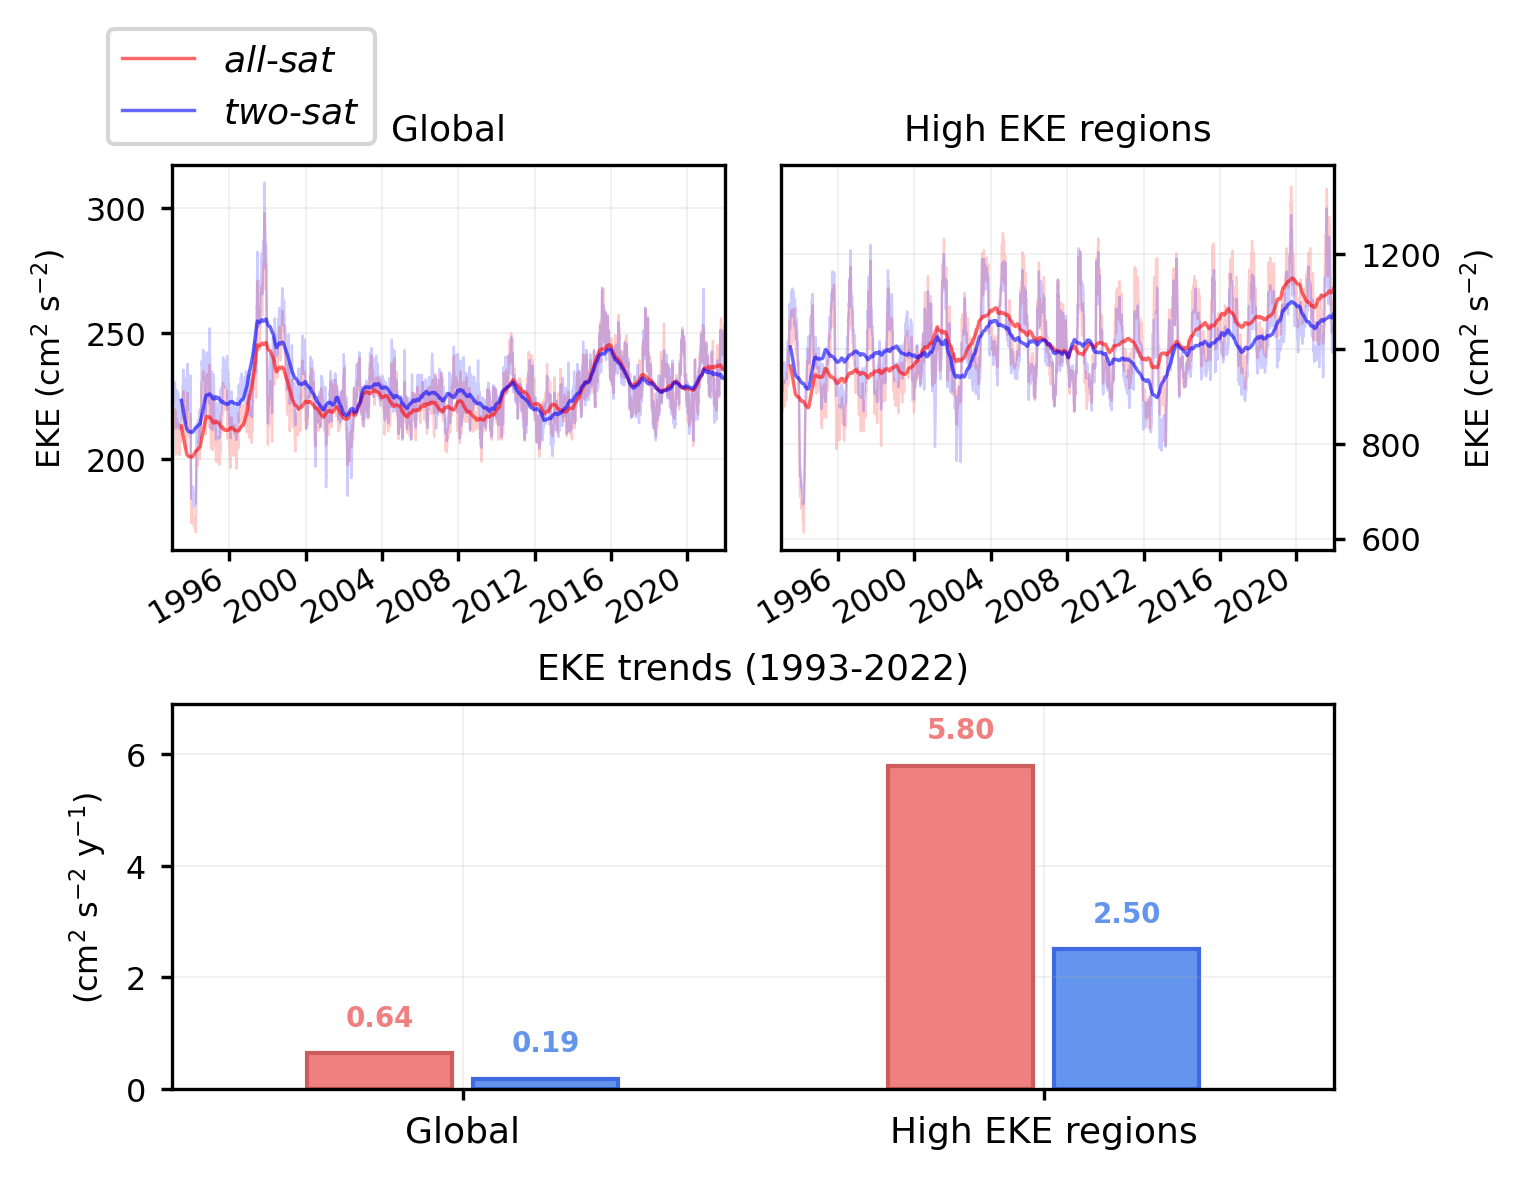

In [14]:
    fs = np.sqrt(fig_size)

    fig = plt.figure(figsize=(5,4),
                     dpi=300)

    gs = mpl.gridspec.GridSpec(2, 2, figure=fig, 
                               height_ratios=[1, 1], 
                               width_ratios=[1, 1])
    ax = [[None]*2 for _ in range(2)]

    fig.subplots_adjust(hspace=0.4, wspace=0.1)

    k = 0
    for i in range(1):
        for j in range(2):
            ax[i][j] = fig.add_subplot(gs[i, j])
            if j == 1:
                ax[i][j].yaxis.tick_right()
                ax[i][j].yaxis.set_label_position("right")

            ax[i][j].grid(which='major', linewidth=fs*0.015)
            ax[i][j].xaxis.set_tick_params(which='minor', bottom=False)
            
            
            ax[i][j].tick_params(axis='both', which='major',
                                labelsize=text_size*fs,
                                size=fs*0.5,
                                width=fs*0.15)

            ax[i][j].tick_params(axis='x', which='major',
                                 pad=0.1)            
            
            all_ts = tseries['ALL_SAT'][dic_keys[k]]
            #365 day rolling mean 
            all_ts_roll = all_ts.rolling(time=365, center=True).mean()
            all_ts_roll.plot(color='r',
                        alpha=0.6,
                        label='ALL SAT',
                        linewidth=fs*lw,
                        ax=ax[i][j])
            
            all_ts.plot(color='r',
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)


            two_ts = tseries['TWO_SAT'][dic_keys[k]]
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
            two_ts_roll.plot(color='b',
                        alpha=0.6,
                        label='TWO SAT',
                        linewidth=fs*lw,
                        ax=ax[i][j])            
            two_ts.plot(color='b',
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)          
            
            ax[i][j].set_xlabel('', fontsize=1*text_size*fs)
            ax[i][j].set_ylabel(r'EKE (cm$^{{2}}$ s$^{{-2}}$)', fontsize=1*text_size*fs)
            start_date = pd.to_datetime('01-01-1993')
            end_date = pd.to_datetime('12-31-2021')

            ax[i][j].set_xlim(start_date, end_date)
            

            ax[i][j].set_title(titles[k], fontsize=text_size*fs+1)
            

            k+=1

    red_line = mlines.Line2D([], [], color='red', alpha=0.6,
                            label=r'$\it{all}$-$\it{sat}$', lw=lw*fs)
    blue_line = mlines.Line2D([], [], color='blue', alpha=0.6,
                            label=r'$\it{two}$-$\it{sat}$', lw=lw*fs) 
    l1 = ax[0][0].legend(handles=[red_line, blue_line],
                        loc='upper center', fontsize=text_size*fs+1,
                        bbox_to_anchor=(0.125,1.4))
    
    """
    Generating bar plot  with the trends of each time series
    """
    ax[1][0] = fig.add_subplot(gs[1, :])
    ax[1][0].grid(which='major', linewidth=fs*0.015)
    ax[1][0].xaxis.set_tick_params(which='minor', bottom=False)
    ax[1][0].tick_params(axis='both', which='major',
                             labelsize=text_size*fs,
                             size=fs*0.5,
                             width=fs*0.15)
    ax[1][0].set_xticks([0, 1])
    
    ax[1][0].set_xticklabels(tick_labels, size=text_size*fs+1)  
            
    plot_utils.plot_bar(x + ofset, list_slope_all[0:2], ax[1][0], wdth, 
                    text_size, fs,  hatchs=mask_nonsig_all[0:2],  
                        kind='all_sat')
    plot_utils.plot_bar(x - ofset, list_slope_two[0:2], ax[1][0], wdth, 
                    text_size, fs, hatchs=mask_nonsig_two[0:2],  
                        kind='two_sat')

    
    # add also trend with text - all-sat
    for i, num in enumerate(list_slope_all[0:2]):
        ax[1][0].text(x[i] + ofset, 
                list_slope_all[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='lightcoral',
                style=text_style_all[i],
                weight='bold' if text_style_all[i] == 'normal' else 'normal')

    # add also trend with text - two-sat
    for i, num in enumerate(list_slope_two[0:2]):
        ax[1][0].text(x[i] - ofset, 
                list_slope_two[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='cornflowerblue',
                style=text_style_two[i],
                weight='bold' if text_style_two[i] == 'normal' else 'normal')
        
    ax[1][0].set_ylim(0, 6.9)
    ax[1][0].set_xlim(-0.5, 1.5)
        
    ax[1][0].set_ylabel(label_unit,
                        fontsize=text_size*fs)

    ax[1][0].set_title('EKE trends (1993-2022)',
                        fontsize=text_size*fs+1)   

    # Create legends for bar plots
    #colors = ['lightcoral', 'cornflowerblue']
    #categories = [r'$\it{all}$-$\it{sat}$', r'$\it{two}$-$\it{sat}$']

    #legend_patches = [Patch(facecolor=color, label=category) for
    #                  color, category in zip(colors, categories)]
    #ax[1][0].legend(handles=legend_patches, loc='best',
    #                fontsize=text_size*fs+1)    

    
    savepath = f'../../figures/Fig_2_1993-2022.{extension}'

    dir_path = os.path.dirname(os.path.realpath(savepath))+'/'
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

    plt.savefig(savepath, dpi=300, bbox_inches='tight')

